
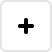
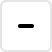
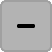
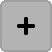
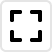
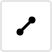
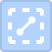

In [1]:
from lets_plot import *

LetsPlot.setup_html()

### Plotting means and error ranges.

There are several ways to show error ranges on a plot. Among them are 
- *geom_errorbar*
- *geom_crossbar*
- *geom_linerange*
- *geom_pointrange*

In [2]:
# This example was found at: www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)
data = dict(
    supp = ['OJ', 'OJ', 'OJ', 'VC', 'VC', 'VC'],
    dose = [0.5, 1.0, 2.0, 0.5, 1.0, 2.0],
    length = [13.23, 22.70, 26.06, 7.98, 16.77, 26.14],
    len_min = [11.83, 21.2, 24.50, 4.24, 15.26, 23.35],
    len_max = [15.63, 24.9, 27.11, 10.72, 19.28, 28.93]
)

In [3]:
p = ggplot(data, aes(x='dose', color='supp'))

### Error-bars with lines and points.

In [4]:
p + geom_errorbar(aes(ymin='len_min', ymax='len_max'), width=.1) \
+ geom_line(aes(y='length')) \
+ geom_point(aes(y='length'))

In [5]:
# The errorbars overlapped, so use position_dodge to move them horizontally
pd = position_dodge(0.1) # move them .05 to the left and right
p + geom_errorbar(aes(ymin='len_min', ymax='len_max'), width=.1, position=pd) \
+ geom_line(aes(y='length'), position=pd) \
+ geom_point(aes(y='length'), position=pd)

In [6]:
# Black errorbars - notice the mapping of 'group=supp'
# Without it, the errorbars won't be dodged!
p + geom_errorbar(aes(ymin='len_min', ymax='len_max', group='supp'), color='black', width=.1, position=pd) \
+ geom_line(aes(y='length'), position=pd) \
+ geom_point(aes(y='length'), position=pd, size=5)

In [7]:
# The finished graph:
# - fixed size
# - point shape # 21 is filled circle 
# - position legend in the bottom right
p1 = p \
+ xlab("Dose (mg)") \
+ ylab("Tooth length (mm)") \
+ scale_color_manual(['orange', 'dark_green'], na_value='gray') \
+ ggsize(700, 400)
p1 + geom_errorbar(aes(ymin='len_min', ymax='len_max', group='supp'), color='black', width=.1, position=pd) \
+ geom_line(aes(y='length'), position=pd) \
+ geom_point(aes(y='length'), position=pd, size=5, shape=21, fill="white") \
+ theme(legend_justification=[1,0], legend_position=[1,0]) \
+ ggtitle("The Effect of Vitamin C on Tooth Growth in Guinea Pigs")

### Error-bars on bar plot.

In [8]:
# Plot error ranges on Bar plot
p1 \
+ geom_bar(aes(y='length', fill='supp'), stat='identity', position='dodge', color='black') \
+ geom_errorbar(aes(ymin='len_min', ymax='len_max', group='supp'), color='black', width=.1, position=position_dodge(0.9)) \
+ theme(legend_justification=[0,1], legend_position=[0,1])

### Crossbars.

In [9]:
# Thickness of the horizontal mid-line can be adjusted using `fatten` parameter.
p1 + geom_crossbar(aes(ymin='len_min', ymax='len_max', middle='length', color='supp'), fatten=5)

### Line-range.

In [10]:
p1 \
+ geom_linerange(aes(ymin='len_min', ymax='len_max', color='supp'), position=pd) \
+ geom_line(aes(y='length'), position=pd)

### Point-range

In [11]:
# Point-range is the same as line-range but with an added mid-point.
p1 \
+ geom_pointrange(aes(y='length', ymin='len_min', ymax='len_max', color='supp'), position=pd) \
+ geom_line(aes(y='length'), position=pd)

In [12]:
# Size of the mid-point can be adjuasted using `fatten` parameter - multiplication factor relative to the line size.
p1 \
+ geom_line(aes(y='length'), position=pd) \
+ geom_pointrange(aes(y='length', ymin='len_min', ymax='len_max', fill='supp'), position=pd, color='rgb(230, 230, 230)', size=5, shape=23, fatten=1) \
+ scale_fill_manual(['orange', 'dark_green'], na_value='gray')